# Stock Price Prediction using Machine Learning

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb 
  
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC 
from xgboost import XGBClassifier 
from sklearn import metrics 
  
import warnings 
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'xgboost'

In [2]:
pip install xgboost


Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 217.9 kB/s eta 0:07:38
   ---------------------------------------- 0.0/99.8 MB 262.6 kB/s eta 0:06:20
   ---------------------------------------- 0.1/99.8 MB 363.1 kB/s eta 0:04:35
   ---------------------------------------- 0.1/99.8 MB 655.8 kB/s eta 0:02:32
   ---------------------------------------- 0.3/99.8 MB 1.1 MB/s eta 0:01:34
   ---------------------------------------- 0.4/99.8 MB 1.2 MB/s eta 0:01:23
   ---------------------------------------- 0.6/99.8 MB 1.7 MB/s eta 0:00:57
   ---------------------------

In [4]:
from xgboost import XGBClassifier 
from sklearn import metrics 
  
import warnings 
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv("C:\\Users\\user\\Desktop\\desktoppp\\Machine_Learning projects\\Tesla.csv") 
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [7]:
df.shape

(1692, 7)

In [8]:
df.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
std,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,30.000000,30.650000,29.215000,29.884999,1.194350e+06,29.884999
50%,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


# Exploratory Data Analysis

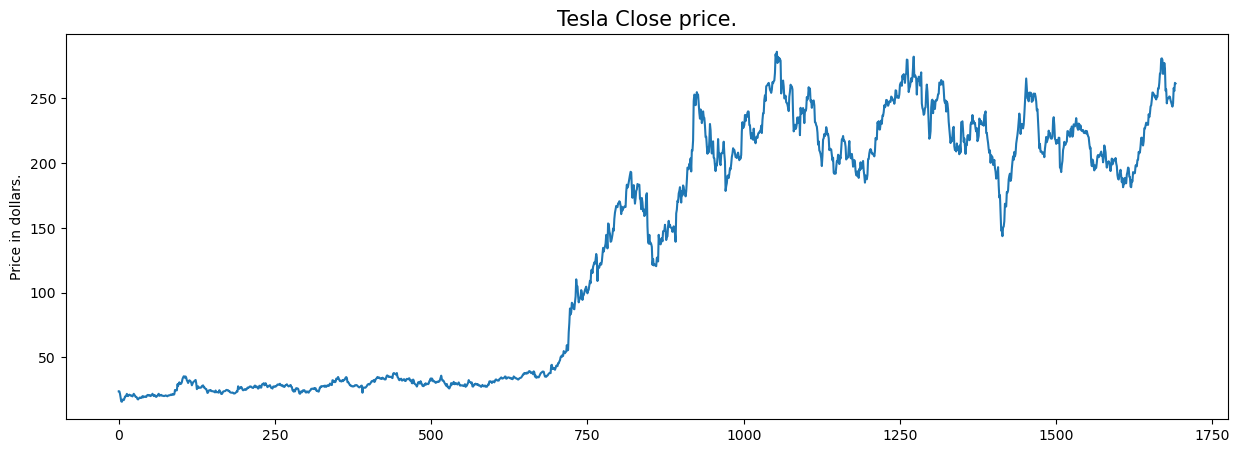

In [10]:
plt.figure(figsize=(15,5)) 
plt.plot(df['Close']) 
plt.title('Tesla Close price.', fontsize=15) 
plt.ylabel('Price in dollars.') 
plt.show()

In [11]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [12]:
df[df['Close'] == df['Adj Close']].shape

(1692, 7)

In [13]:
df = df.drop(['Adj Close'], axis=1)

In [14]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

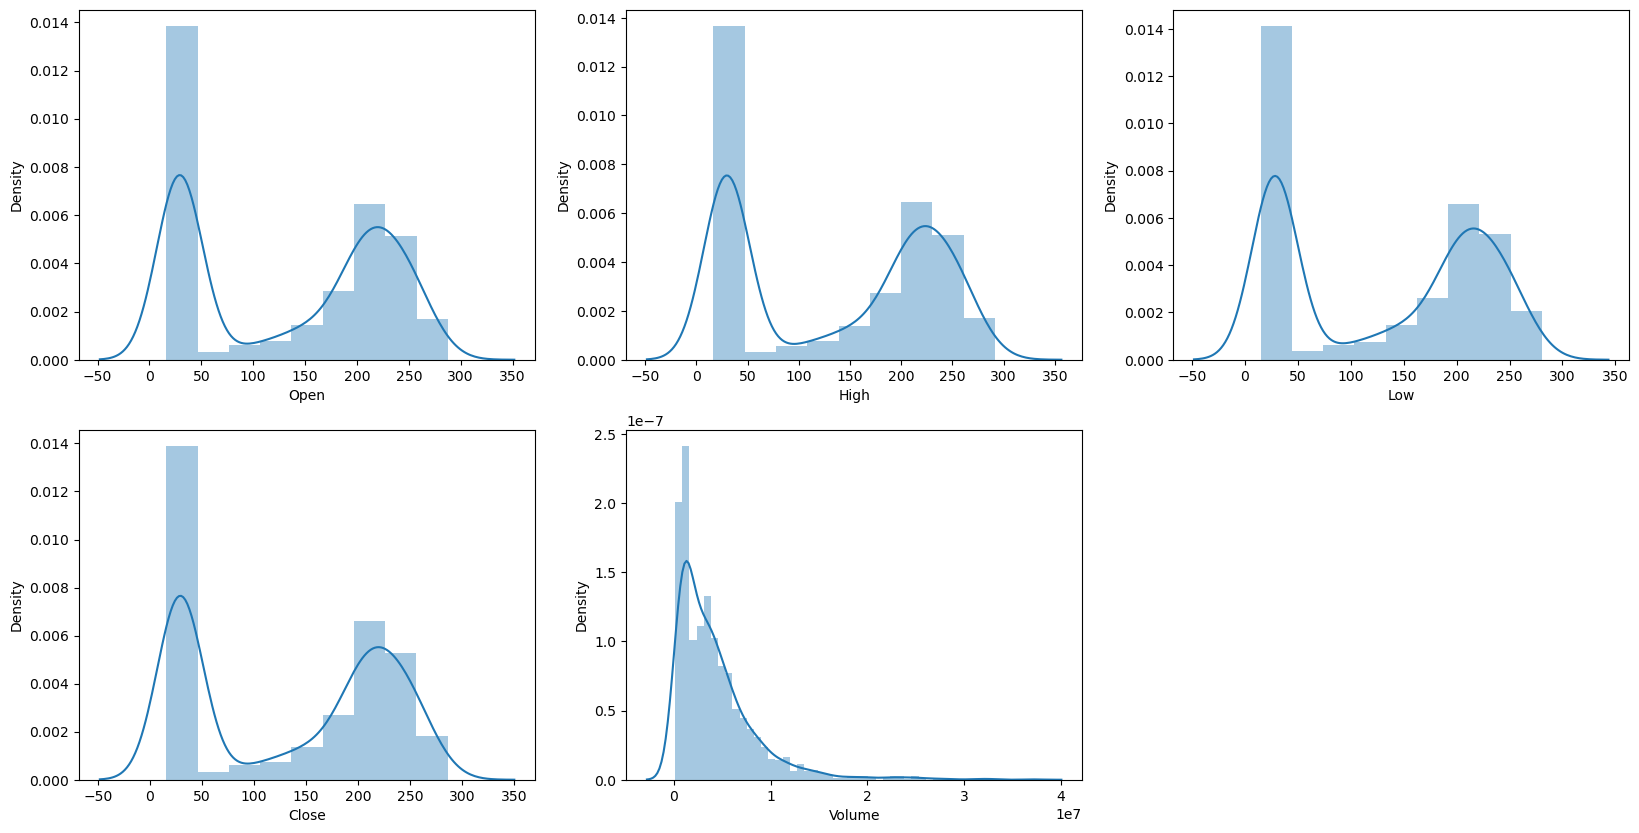

In [15]:
features = ['Open', 'High', 'Low', 'Close', 'Volume'] 
  
plt.subplots(figsize=(20,10)) 
  
for i, col in enumerate(features): 
  plt.subplot(2,3,i+1) 
  sb.distplot(df[col]) 
plt.show()

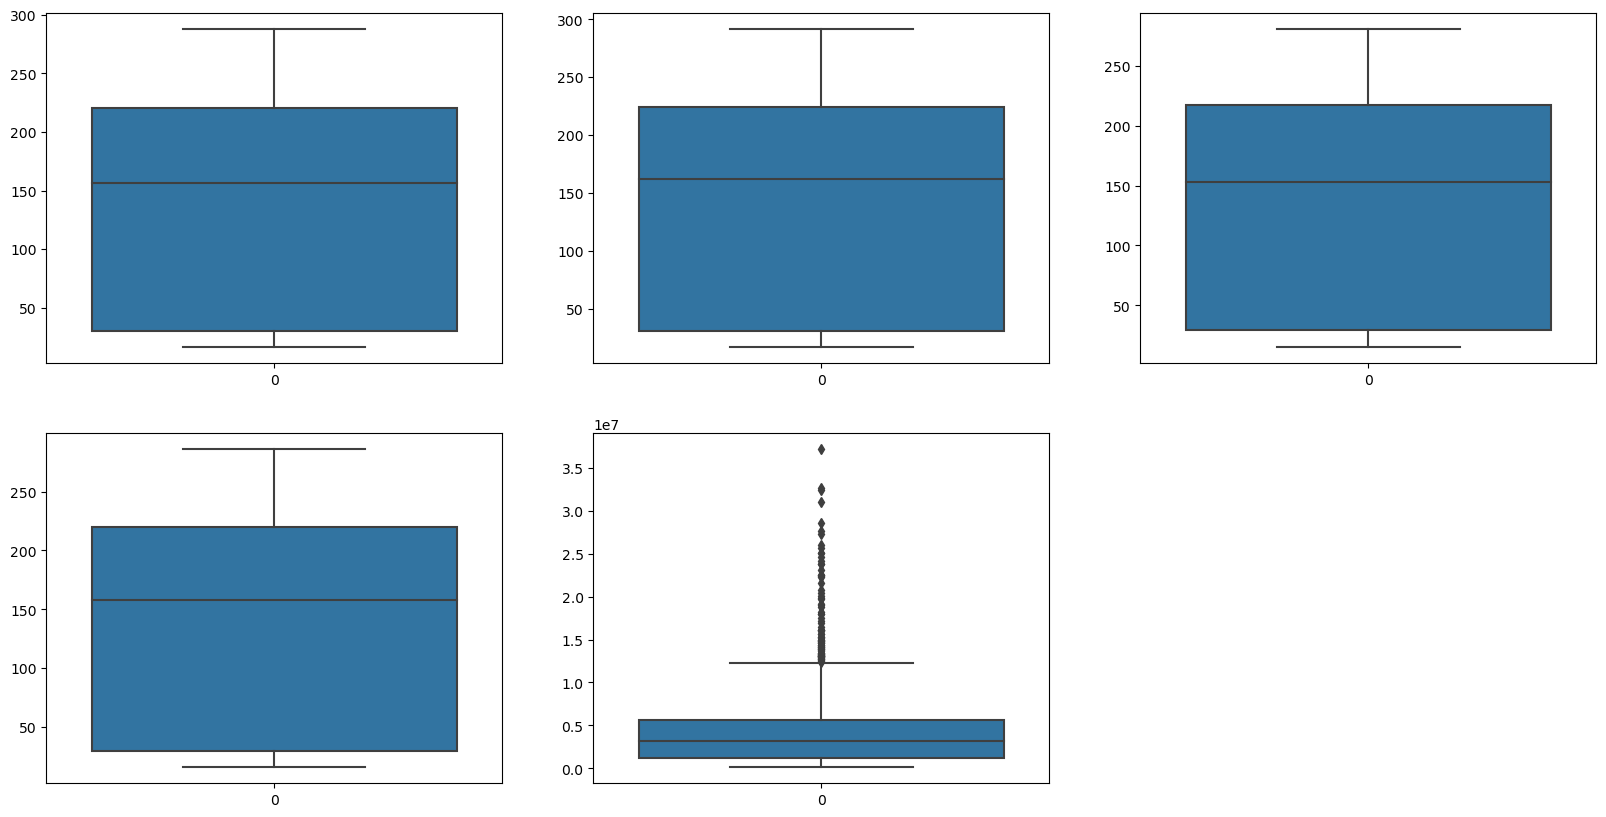

In [16]:
plt.subplots(figsize=(20,10)) 
for i, col in enumerate(features): 
  plt.subplot(2,3,i+1) 
  sb.boxplot(df[col]) 
plt.show()

# Feature Engineering

In [17]:
splitted = df['Date'].str.split('/', expand=True) 
  
df['day'] = splitted[1].astype('int') 
df['month'] = splitted[0].astype('int') 
df['year'] = splitted[2].astype('int') 
  
df.head()

,Date,Open,High,Low,Close,Volume,day,month,year
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,29,6,2010
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,30,6,2010
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,1,7,2010
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,2,7,2010
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,6,7,2010


In [18]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0) 
df.head()

,Date,Open,High,Low,Close,Volume,day,month,year,is_quarter_end
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,29,6,2010,1
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,30,6,2010,1
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,1,7,2010,0
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,2,7,2010,0
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,6,7,2010,0


In [19]:
data_grouped = df.groupby('year').mean() 
plt.subplots(figsize=(20,10)) 
  
for i, col in enumerate(['Open', 'High', 'Low', 'Close']): 
  plt.subplot(2,2,i+1) 
  data_grouped[col].plot.bar() 
plt.show()

TypeError: Could not convert 6/29/20106/30/20107/1/20107/2/20107/6/20107/7/20107/8/20107/9/20107/12/20107/13/20107/14/20107/15/20107/16/20107/19/20107/20/20107/21/20107/22/20107/23/20107/26/20107/27/20107/28/20107/29/20107/30/20108/2/20108/3/20108/4/20108/5/20108/6/20108/9/20108/10/20108/11/20108/12/20108/13/20108/16/20108/17/20108/18/20108/19/20108/20/20108/23/20108/24/20108/25/20108/26/20108/27/20108/30/20108/31/20109/1/20109/2/20109/3/20109/7/20109/8/20109/9/20109/10/20109/13/20109/14/20109/15/20109/16/20109/17/20109/20/20109/21/20109/22/20109/23/20109/24/20109/27/20109/28/20109/29/20109/30/201010/1/201010/4/201010/5/201010/6/201010/7/201010/8/201010/11/201010/12/201010/13/201010/14/201010/15/201010/18/201010/19/201010/20/201010/21/201010/22/201010/25/201010/26/201010/27/201010/28/201010/29/201011/1/201011/2/201011/3/201011/4/201011/5/201011/8/201011/9/201011/10/201011/11/201011/12/201011/15/201011/16/201011/17/201011/18/201011/19/201011/22/201011/23/201011/24/201011/26/201011/29/201011/30/201012/1/201012/2/201012/3/201012/6/201012/7/201012/8/201012/9/201012/10/201012/13/201012/14/201012/15/201012/16/201012/17/201012/20/201012/21/201012/22/201012/23/201012/27/201012/28/201012/29/201012/30/201012/31/2010 to numeric

In [20]:
print(df.dtypes)


Date               object
Open              float64
High              float64
Low               float64
Close             float64
Volume              int64
day                 int32
month               int32
year                int32
is_quarter_end      int32
dtype: object


In [27]:
# Example: Convert columns to numeric if they should be
df['Date'] = pd.to_numeric(df['Date'], errors='coerce')


In [28]:
print(df.dtypes)

Date              float64
Open              float64
High              float64
Low               float64
Close             float64
Volume              int64
day                 int32
month               int32
year                int32
is_quarter_end      int32
dtype: object


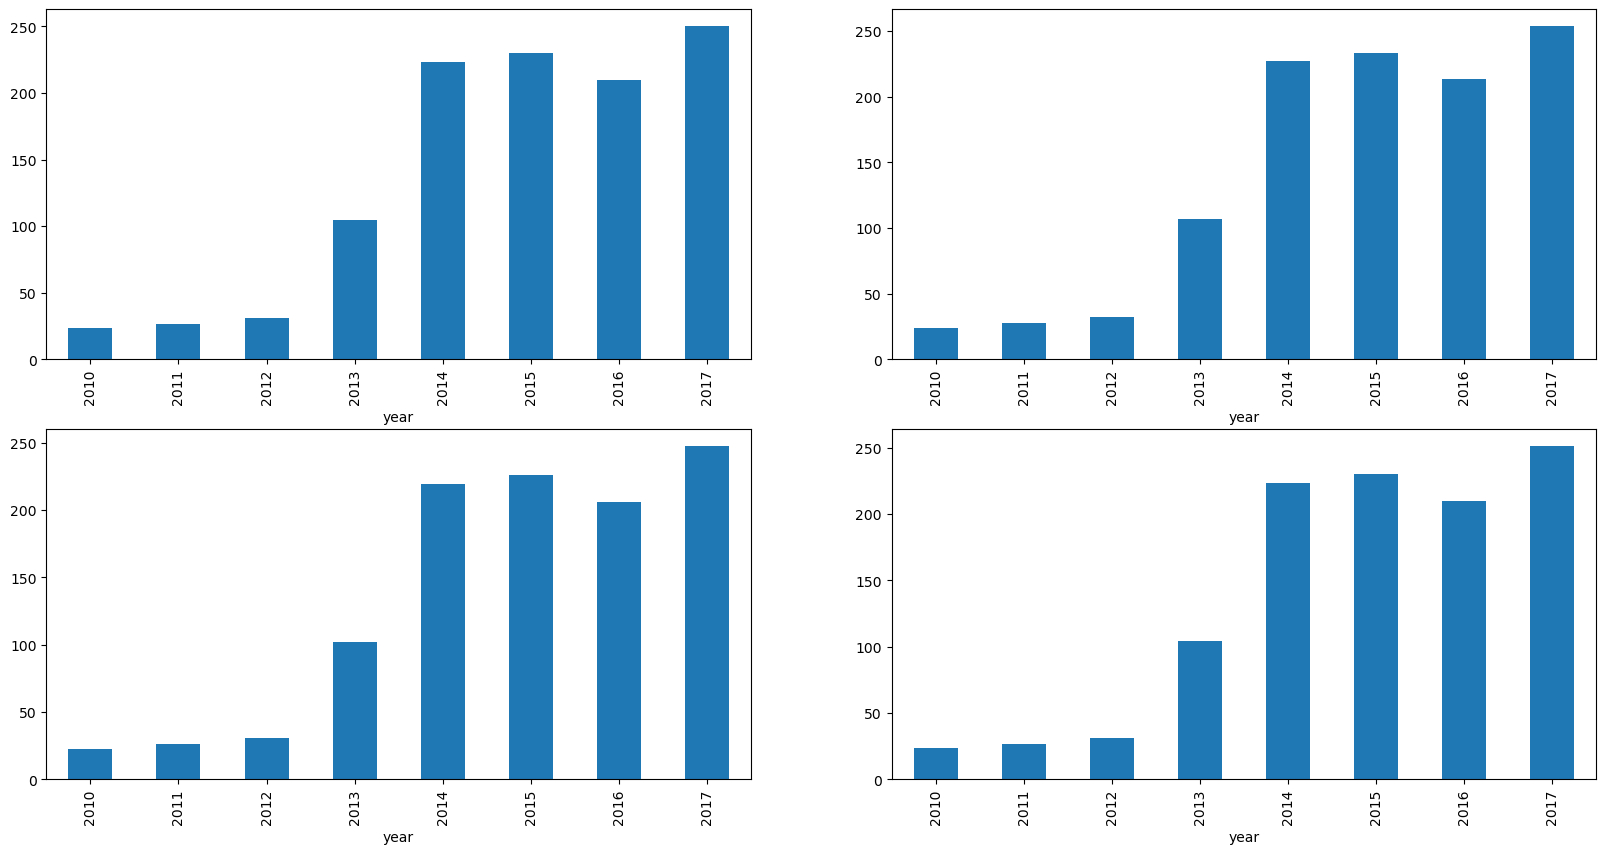

In [29]:
data_grouped = df.groupby('year').mean() 
plt.subplots(figsize=(20,10)) 
  
for i, col in enumerate(['Open', 'High', 'Low', 'Close']): 
  plt.subplot(2,2,i+1) 
  data_grouped[col].plot.bar() 
plt.show()

In [30]:
df.groupby('is_quarter_end').mean()

,Date,Open,High,Low,Close,Volume,day,month,year
is_quarter_end,,,,,,,,,
0,NaN,130.813739,133.182620,128.257229,130.797709,4.461581e+06,15.686501,6.141208,2013.353464
1,NaN,135.679982,137.927032,133.455777,135.673269,3.891084e+06,15.657244,7.584806,2013.314488


In [31]:
df['open-close']  = df['Open'] - df['Close'] 
df['low-high']  = df['Low'] - df['High'] 
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

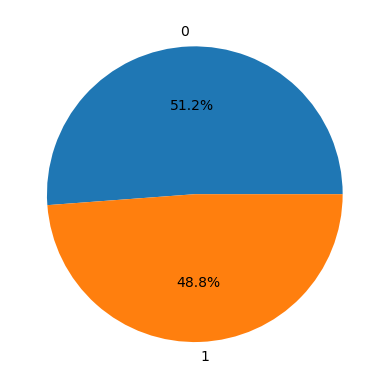

In [32]:
plt.pie(df['target'].value_counts().values,  
        labels=[0, 1], autopct='%1.1f%%') 
plt.show()

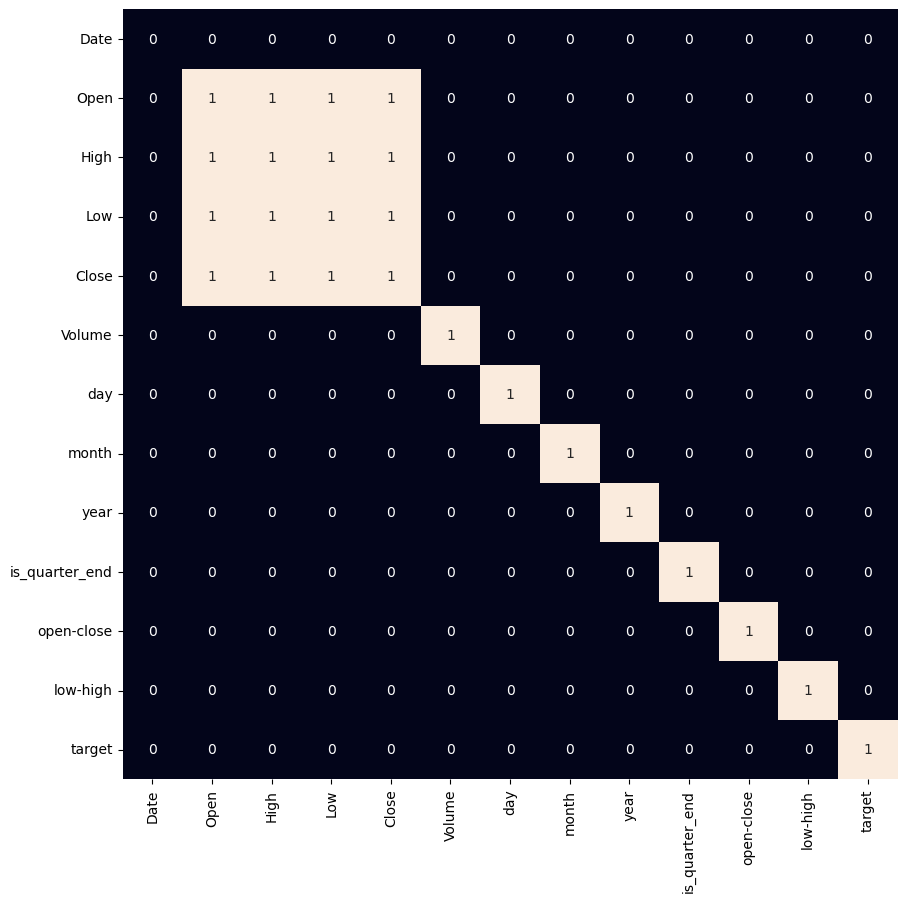

In [33]:
plt.figure(figsize=(10, 10)) 
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False) 
plt.show()

# Data Splitting and Normalization

In [34]:
features = df[['open-close', 'low-high', 'is_quarter_end']] 
target = df['target'] 
  
scaler = StandardScaler() 
features = scaler.fit_transform(features) 
  
X_train, X_valid, Y_train, Y_valid = train_test_split( 
    features, target, test_size=0.1, random_state=2022) 
print(X_train.shape, X_valid.shape) 

(1522, 3) (170, 3)


# Model Development and Evaluation

In [35]:
models = [LogisticRegression(), SVC( 
  kernel='poly', probability=True), XGBClassifier()] 
  
for i in range(3): 
  models[i].fit(X_train, Y_train) 
  
  print(f'{models[i]} : ') 
  print('Training Accuracy : ', metrics.roc_auc_score( 
    Y_train, models[i].predict_proba(X_train)[:,1])) 
  print('Validation Accuracy : ', metrics.roc_auc_score( 
    Y_valid, models[i].predict_proba(X_valid)[:,1])) 
  print()

LogisticRegression() : 
Training Accuracy :  0.5191709844559586
Validation Accuracy :  0.5435330347144457

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.4719516407599309
Validation Accuracy :  0.4464585666293393

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training 

# plot a confusion matrix for the validation data

In [36]:
metrics.plot_confusion_matrix(models[0], X_valid, Y_valid) 
plt.show()

AttributeError: module 'sklearn.metrics' has no attribute 'plot_confusion_matrix'

In [37]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(models[0], X_valid, Y_valid)
plt.show()

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (C:\anaconda\anaconda3\Lib\site-packages\sklearn\metrics\__init__.py)

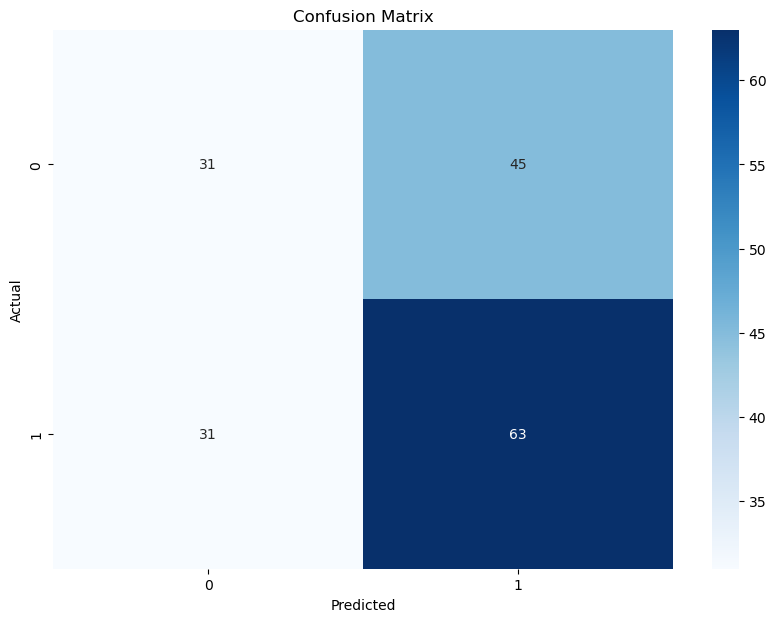

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming models[0] is your trained model, X_valid is your validation features, and Y_valid is your validation labels
y_pred = models[0].predict(X_valid)
cm = confusion_matrix(Y_valid, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
